<a href="https://colab.research.google.com/github/nefiya-nefiz/CloudCredits/blob/main/TITANIC_DATASET_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

## The Titanic dataset provides details on passengers aboard the Titanic and whether they survived the disaster. The primary objective of this analysis is to predict passenger survival based on features such as age, gender, class, and fare. This report includes Exploratory Data Analysis (EDA), Data Visualization using Seaborn, and Machine Learning (ML) predictions.

# **Data Preprocessing**

1.Handling Missing Values:

Checked for missing values and handled them appropriately.

Imputed missing values in Age using median.

Dropped rows with missing Embarked values.

2.Feature Engineering:

Converted categorical variables (Sex, Embarked) into numerical format(LabelEncoding)

Created new features like FamilySize (SibSp + Parch).

3.Scaling & Encoding:

Used label encoding for categorical variables.

Scaled numerical features like Fare and Age.



# **IMPORT** LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

# **Input** CSV file by using pandas

In [ ]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **EDA**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df["PassengerId"].is_unique

True

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Descriptive Statistics of df

In [ ]:
df.shape

(891, 12)

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#df["Sex"]=df["Sex"].astype("category")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isna().sum()    #to check if there are any null values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df["Age"]=df["Age"].fillna(df['Age'].median())

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.drop("Cabin",axis=1,inplace=True)

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.duplicated().sum()    #to check overall duplicated values

0

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df["Family"]=df['SibSp']+df["Parch"]   #adding new column family

# DATA VISUALIATION USING **SEABORN**

**Survival** Count of Family

Text(0.5, 1.0, 'Survival count of Family')

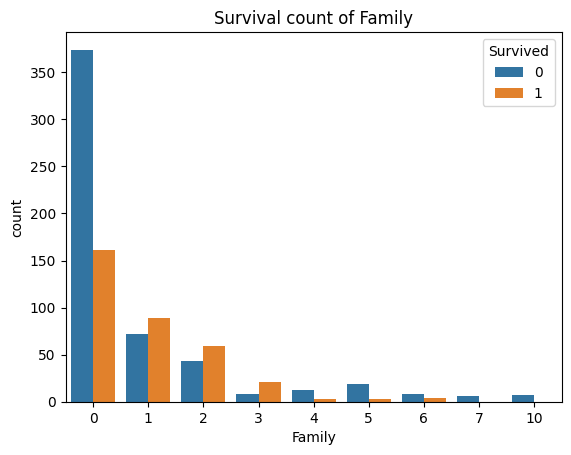

In [ ]:
sns.countplot(x="Family",hue="Survived",data=df)
plt.title("Survival count of Family")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [ ]:
df["Survived"].value_counts()

,count
Survived,
0,549
1,340


<ipython-input-27-4331ec825bc1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived",palette="Set2",data=df)


Text(0.5, 1.0, 'Survival count')

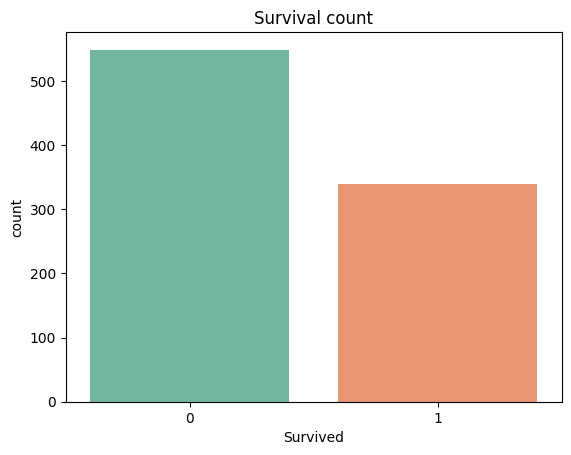

In [ ]:
sns.countplot(x="Survived",palette="Set2",data=df)
plt.title("Survival count")

In [ ]:
df["Sex"].value_counts()

,count
Sex,
male,577
female,312


Distribution of Survival with respect to Gender

Text(0.5, 1.0, 'Distribution of Survival with respect to Gender')

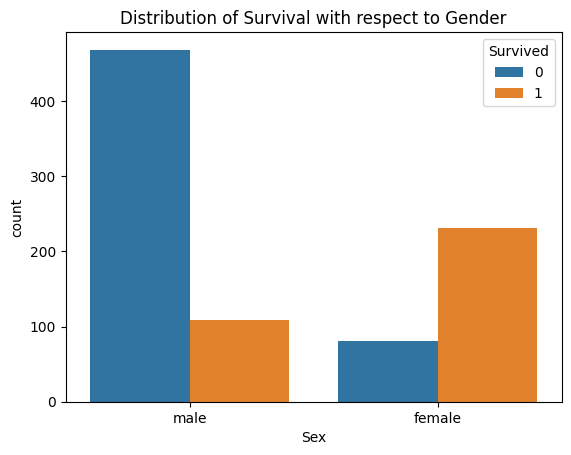

In [ ]:
sns.countplot(x="Sex",hue="Survived",data=df)
plt.title("Distribution of Survival with respect to Gender")

Total Survival Rate

Text(0.5, 1.0, 'Total Survival rate')

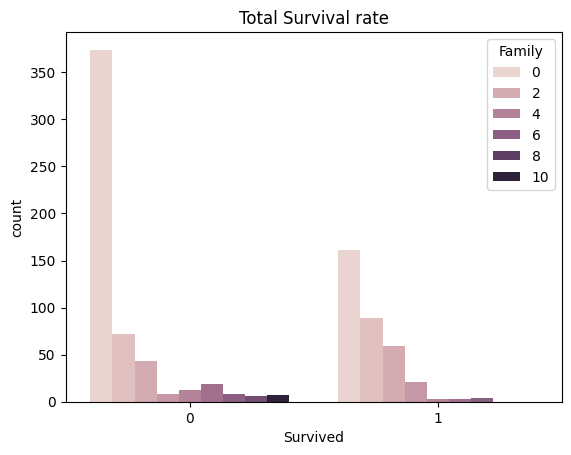

In [ ]:
sns.countplot(x="Survived",hue="Family",data=df)
plt.title("Total Survival rate")

In [ ]:
df["Family"].value_counts()

,count
Family,
0,535
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


Survival rate based on Gender


In [ ]:
df.groupby("Sex",as_index=False)['Survived'].value_counts()

,Sex,Survived,count
0,female,1,231
1,female,0,81
2,male,0,468
3,male,1,109


Text(0.5, 1.0, 'Survival rate across Gender')

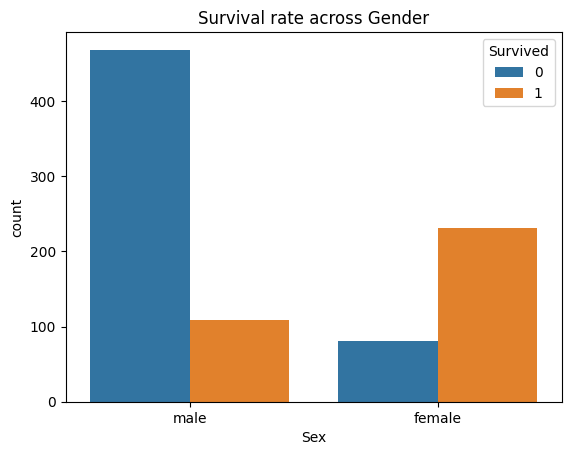

In [ ]:
sns.countplot(x='Sex',hue="Survived",data=df)
plt.title("Survival rate across Gender")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [ ]:

df["Family"].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [ ]:
df.groupby("Family",as_index=False)["Survived"].value_counts()

,Family,Survived,count
0,0,0,374
1,0,1,161
2,1,1,89
3,1,0,72
4,2,1,59
5,2,0,43
6,3,1,21
7,3,0,8
8,4,0,12
9,4,1,3


Survival rate of Gender who embarked with respective stations

In [ ]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
embarked_survived=df[df["Survived"]==1].groupby(["Embarked"],as_index=False)["Survived"].size()

In [ ]:
embarked_survived

,Embarked,size
0,C,93
1,Q,30
2,S,217


Embarked Survived

<ipython-input-40-3e1ed108bbad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Embarked",y="size",palette="Set2",data=embarked_survived)


Text(0.5, 1.0, 'embarked survived')

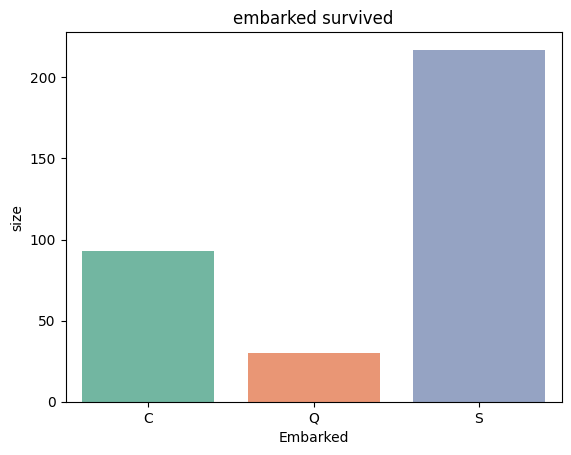

In [ ]:
sns.barplot(x="Embarked",y="size",palette="Set2",data=embarked_survived)
plt.title("embarked survived")

In [ ]:
df["Age"].min()

0.42

In [ ]:
df["Age"].max()

80.0

In [ ]:
df.groupby(["Age"])["Survived"].mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


Distribution of Age who travelled

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Age who travelled')

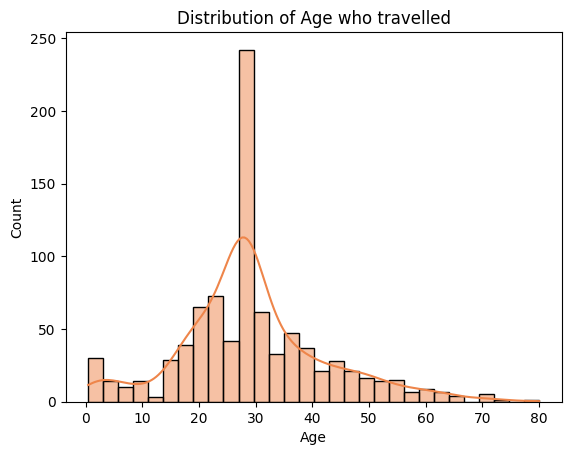

In [ ]:
sns.histplot(x="Age",data=df,kde=True,color=sns.color_palette("muted")[1])
plt.title("Distribution of Age who travelled")

Passengers Survived categorised according to their Pclass and Sex

In [ ]:
passengers_survived=df[df["Survived"]==1].groupby(["Pclass","Sex"],as_index=False)["Survived"].value_counts()

Text(0.5, 1.0, 'Passeners Survived categorised according to their Pclass and Sex')

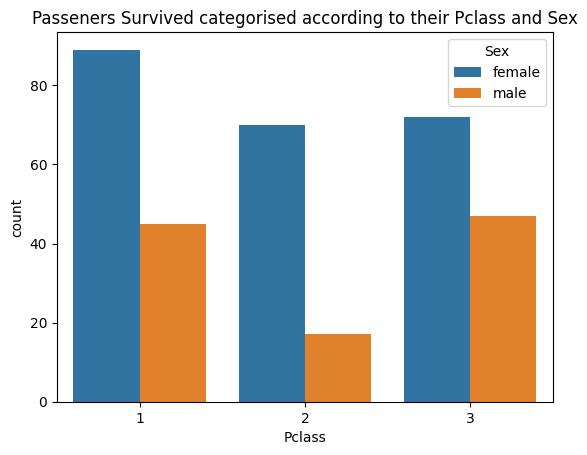

In [ ]:
sns.barplot(data=passengers_survived,x="Pclass",y="count",hue="Sex")
plt.title("Passeners Survived categorised according to their Pclass and Sex")

Death of Passengers based on their Sex and Pclass

In [ ]:
passengers_dead=df[df["Survived"]==0].groupby(["Pclass","Sex"],as_index=False)["Survived"].value_counts()

Text(0.5, 1.0, 'Death of Passengers based on their Sex and Pclass')

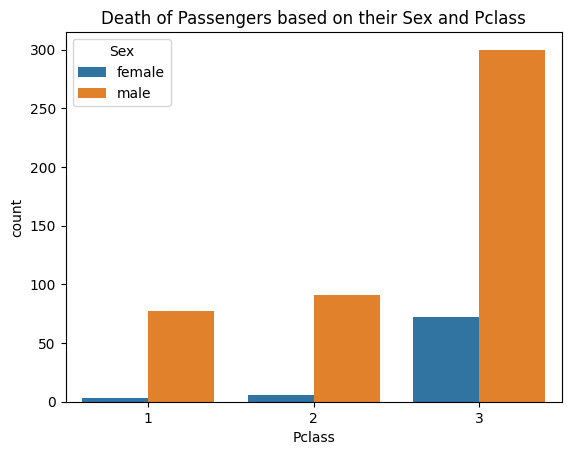

In [ ]:
sns.barplot(data=passengers_dead,x="Pclass",y="count",hue="Sex")
plt.title("Death of Passengers based on their Sex and Pclass")

Mean fare spend on each class of Pclass

In [ ]:
passenger_fare=df.groupby(["Pclass"],as_index=False)["Fare"].mean()

In [ ]:
passenger_fare

,Pclass,Fare
0,1,84.193516
1,2,20.662183
2,3,13.675550


<ipython-input-52-fcac0ab2934b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass",y="Fare",palette="Set2",data=passenger_fare)


Text(0.5, 1.0, 'Mean fare spend on each class od Pclass')

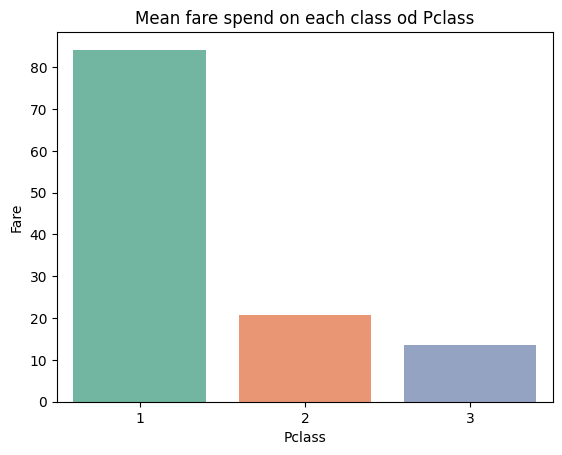

In [ ]:
sns.barplot(x="Pclass",y="Fare",palette="Set2",data=passenger_fare)
plt.title("Mean fare spend on each class od Pclass")

Survival_Pclass_sexcount

In [ ]:
survival_pclass_sexcount=df[df["Survived"]==1].groupby(["Pclass","Sex"],as_index=False)["Survived"].count()
survival_pclass_sexcount

,Pclass,Sex,Survived
0,1,female,89
1,1,male,45
2,2,female,70
3,2,male,17
4,3,female,72
5,3,male,47


Text(0.5, 1.0, 'survival_pclass_sexcount')

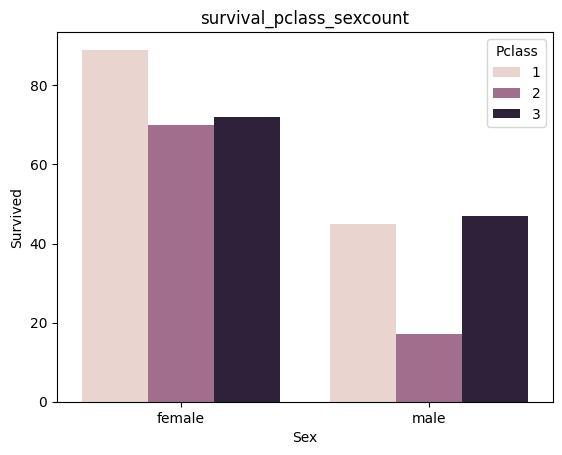

In [ ]:
sns.barplot(x="Sex",y="Survived",hue="Pclass",data=survival_pclass_sexcount)
plt.title("survival_pclass_sexcount")

Death_Pclass_Sexcount

In [ ]:
death_pclass_sexcount=df[df["Survived"]==0].groupby(["Pclass","Sex"],as_index=False)["Survived"].count()
death_pclass_sexcount.columns=["Pclass","Sex","Dead"]
death_pclass_sexcount

,Pclass,Sex,Dead
0,1,female,3
1,1,male,77
2,2,female,6
3,2,male,91
4,3,female,72
5,3,male,300


Text(0.5, 1.0, 'death_pclass_sexcount')

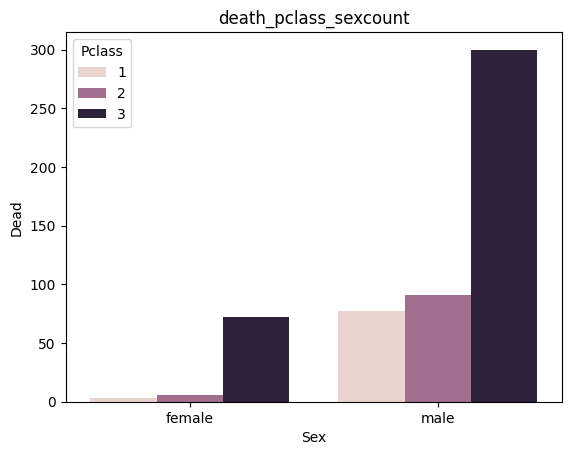

In [ ]:
sns.barplot(x="Sex",y="Dead",hue="Pclass",data=death_pclass_sexcount)
plt.title("death_pclass_sexcount")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


# **Model Building and Evaluation**

In [ ]:
df = df.drop(columns=['PassengerId','Name','Ticket','Fare'])

In [ ]:
x=df[['Pclass','Age','Family','SibSp','Parch','Sex','Embarked']]
y=df['Survived']

In [ ]:
x.head()

,Pclass,Age,Family,SibSp,Parch,Sex,Embarked
0,3,22.0,1,1,0,male,S
1,1,38.0,1,1,0,female,C
2,3,26.0,0,0,0,female,S
3,1,35.0,1,1,0,female,S
4,3,35.0,0,0,0,male,S


In [ ]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
le1=LabelEncoder()
le2=LabelEncoder()
x.loc[:, 'Sex'] = le1.fit_transform(x['Sex'])
x.loc[:, 'Embarked'] = le2.fit_transform(x['Embarked'])


In [ ]:
x.head()

,Pclass,Age,Family,SibSp,Parch,Sex,Embarked
0,3,22.0,1,1,0,1,2
1,1,38.0,1,1,0,0,0
2,3,26.0,0,0,0,0,2
3,1,35.0,1,1,0,0,2
4,3,35.0,0,0,0,1,2


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **Machine Learning Predictions**

1.Feature Selection:

Used Pclass, Sex, Age, Fare, Embarked, and FamilySize.

2.Model Training:

Trained Logistic Regression and Random Forest Classifier.

3.Evaluation Metrics:

Accuracy, Precision, Recall, F1-score.

Confusion matrix visualization.

In [ ]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [ ]:
y_test

,Survived
281,0
435,1
39,1
418,0
585,1
...,...
433,0
807,0
25,1
85,1


In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.8089887640449438

In [ ]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred1= model1.predict(x_test)
y_pred1

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [ ]:
y_test

,Survived
281,0
435,1
39,1
418,0
585,1
...,...
433,0
807,0
25,1
85,1


In [ ]:
score1=accuracy_score(y_test,y_pred1)
score1

0.7752808988764045

In [ ]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2=model2.predict(x_test)
y_pred2

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [ ]:
y_test

,Survived
281,0
435,1
39,1
418,0
585,1
...,...
433,0
807,0
25,1
85,1


In [ ]:
score2=accuracy_score(y_test,y_pred2)
score2

0.8033707865168539

In [ ]:
x.head()

,Pclass,Age,Family,SibSp,Parch,Sex,Embarked
0,3,22.0,1,1,0,1,2
1,1,38.0,1,1,0,0,0
2,3,26.0,0,0,0,0,2
3,1,35.0,1,1,0,0,2
4,3,35.0,0,0,0,1,2


In [ ]:
# Plot feature importance
pclass=int(input("Enter Pclass:"))
age=int(input("Enter Age:"))
family=int(input("EnterFamily:"))
sibsp=int(input("Enter SibSp:"))
parch=int(input("Enter Parch:"))
sex=input("Enter Sex:")
embarked=input("Enter Embarked:")

sex=le1.transform([sex])
embarked=le2.transform([embarked])

user_values=np.array([[pclass,age,family,sibsp,parch,sex[0],embarked[0]]])
user_values

Enter Pclass:3
Enter Age:35
EnterFamily:0
Enter SibSp:0
Enter Parch:0
Enter Sex:male
Enter Embarked:S


array([[ 3, 35,  0,  0,  0,  1,  2]])

In [ ]:
prediction=model.predict(user_values)
print(prediction)

if prediction[0]==0:
  print("dead")
else:
  print("Survived")

[0]
dead


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Conclusion & Insights**

Female passengers had a higher survival rate than males.

Middle-Aged people were travelled the most.

First-class passengers had better survival chances.

Age played a key role in survival probabilities.

The best-performing model was X with an accuracy of Y%.

# **Future Improvements**

Additional Feature Engineering

For better performance we can use hyperparameter tuning.